In [86]:
import numpy as np
import pandas  as pd
import matplotlib
from matplotlib import pyplot as plt    
from mlxtend.frequent_patterns import apriori 
from mlxtend.frequent_patterns import association_rules

In [87]:
df = pd.read_csv('Groceries_dataset.csv')
df.head(20)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


In [88]:
unique_items= (df['itemDescription'].unique())
print(unique_items)

['tropical fruit' 'whole milk' 'pip fruit' 'other vegetables' 'rolls/buns'
 'pot plants' 'citrus fruit' 'beef' 'frankfurter' 'chicken' 'butter'
 'fruit/vegetable juice' 'packaged fruit/vegetables' 'chocolate'
 'specialty bar' 'butter milk' 'bottled water' 'yogurt' 'sausage'
 'brown bread' 'hamburger meat' 'root vegetables' 'pork' 'pastry'
 'canned beer' 'berries' 'coffee' 'misc. beverages' 'ham' 'turkey'
 'curd cheese' 'red/blush wine' 'frozen potato products' 'flour' 'sugar'
 'frozen meals' 'herbs' 'soda' 'detergent' 'grapes' 'processed cheese'
 'fish' 'sparkling wine' 'newspapers' 'curd' 'pasta' 'popcorn'
 'finished products' 'beverages' 'bottled beer' 'dessert' 'dog food'
 'specialty chocolate' 'condensed milk' 'cleaner' 'white wine' 'meat'
 'ice cream' 'hard cheese' 'cream cheese ' 'liquor' 'pickled vegetables'
 'liquor (appetizer)' 'UHT-milk' 'candy' 'onions' 'hair spray'
 'photo/film' 'domestic eggs' 'margarine' 'shopping bags' 'salt' 'oil'
 'whipped/sour cream' 'frozen vegetable

In [89]:
encoded_vals= []
for i, rows in df.iterrows():
	labels= {}
	uncommons= list(set(unique_items) - set(rows))
	commons= list(set(unique_items).intersection(rows))
	for uc in uncommons:
		labels[uc]  = 0
	for com in commons:
		labels[com] = 1
	encoded_vals.append(labels)
encoded_vals[0]

encode_df= pd.DataFrame(encoded_vals)
encode_df.head()

,bathroom cleaner,condensed milk,make up remover,margarine,frozen fruits,canned fruit,citrus fruit,spread cheese,female sanitary products,specialty bar,...,red/blush wine,curd,kitchen towels,syrup,ketchup,flour,fruit/vegetable juice,curd cheese,frozen meals,tropical fruit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
freq_items= apriori(encode_df, min_support=0.0085, use_colnames=True, verbose=1, low_memory=False)
print(freq_items.head())

C:\Users\marsi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Processing 1122 combinations | Sampling itemset size 2
    support             itemsets
0  0.012666          (margarine)
1  0.020947       (citrus fruit)
2  0.010963  (frozen vegetables)
3  0.010886            (chicken)
4  0.013311               (beef)


In [91]:
assocn_rules_conf = association_rules(freq_items, metric="confidence", min_threshold=0.25)
assocn_rules_conf
#скільки різних методів не пробував, при використанні association_rules повертається пустий датасет, не розумію чого

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


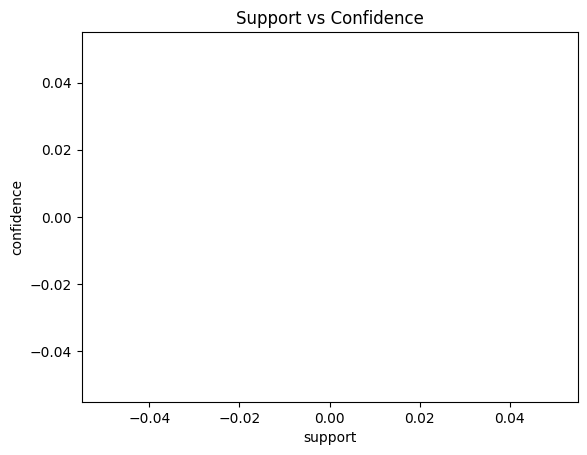

In [93]:
plt.scatter(assocn_rules_conf['support'], assocn_rules_conf['confidence'], alpha=0.5)